In [18]:
%load_ext autoreload
%autoreload 2


# import RunANOVA.anova_processor as anov
import sys
sys.path.append('./RunAnova/RunAnova')

import one_way_anova as anov
import pandas as pd
# from imp import reload
# reload(anov)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [19]:
resp_var = 'age'
treatment = 'company'
experiment = {'NASA' : [18,19,20,21,22,23,18,19,20,21],
             'Tesla' : [18,20,16,20,21,20,18,19,17,13], 
             'Orange' : [21,22,17,18,22,19,21,20,18,23]}

exp_df = pd.DataFrame(experiment)
exp_df.index.name = "observation"
exp_df

,NASA,Tesla,Orange
observation,,,
0,18,18,21
1,19,20,22
2,20,16,17
3,21,20,18
4,22,21,22
5,23,20,19
6,18,18,21
7,19,19,20
8,20,17,18


For a level of confidence of 0.95


,Treatment,Mean,Std error,CI
1,Tesla,18.2,0.757188,"(16.487122241199774, 19.912877758800224)"
0,NASA,20.1,0.525991,"(18.91012540240291, 21.28987459759709)"
2,Orange,20.1,0.640312,"(18.651512664237085, 21.548487335762918)"


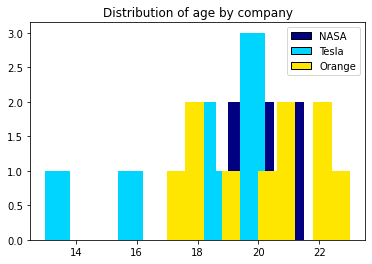

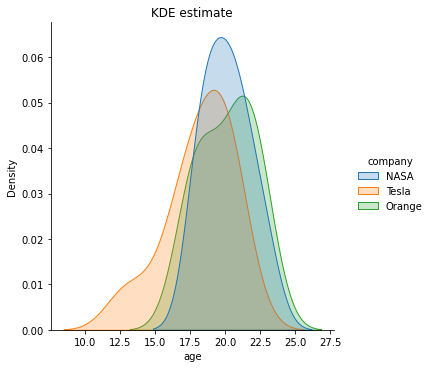

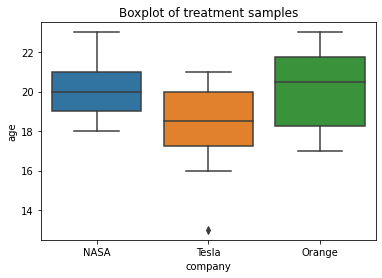

In [20]:
anova_proc = anov.OneWayAnova(exp_df, resp_var=resp_var, treatment=treatment)
anova_proc.show_distribution()

For a level of confidence of 0.95


,Treatment,Mean,Std error,CI
1,Tesla,18.2,0.757188,"(16.487122241199774, 19.912877758800224)"
0,NASA,20.1,0.525991,"(18.91012540240291, 21.28987459759709)"
2,Orange,20.1,0.640312,"(18.651512664237085, 21.548487335762918)"


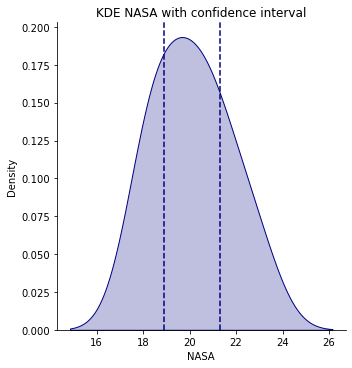

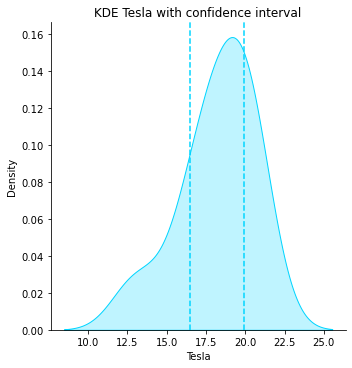

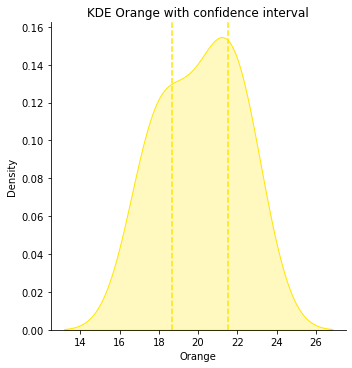

In [21]:
anova_proc.compute_indep_ci(0.95, show=True)

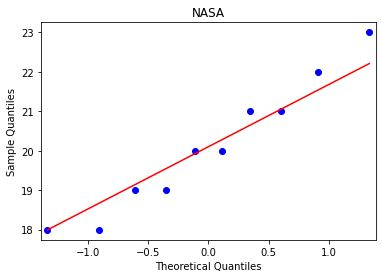

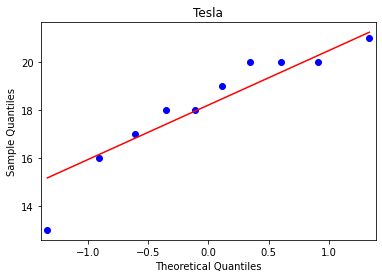

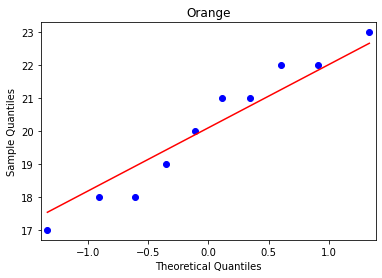

Shapiro-Wilk test 
If p > 0.05 we fail to reject null hypoteshsi -> Gaussian
NASA statistics=0.948, p=0.646
Tesla statistics=0.905, p=0.250
Orange statistics=0.944, p=0.596
Levene test 
 if p-value >0.05 non-statistically significant difference in their varability


In [22]:
anova_proc.normality_test(test_type="qqplot")
anova_proc.normality_test(test_type="shapiro")
anova_proc.normality_test(test_type="levene")


In [23]:
anova_proc.run_anova(simple=False)

Grand Mean 1.9e+01
SST: 2.4e+01, dof k-1:  2, MST: 1.2e+01
SSE: 2.4e+01, dof n-k:  27, MSE: 4.2
TSS=SST+SSE total variation: 1.4e+02, DOF: 29
Test statistic: F=MST/MSE=2.9
F_alpha:3.4
We fail to reject the null hypothesis
P-value: 0.074
eta squared 0.18 omega_squared2.4e+01
